In [ ]:
# Install all required packages with pip
!pip install pandas nltk transformers torch numpy scipy matplotlib seaborn

In [1]:
import pandas as pd
import nltk
from transformers import pipeline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoConfig
import torch
import numpy as np

import torch
import torch.nn as nn
from scipy.special import softmax
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\danie\anaconda3\envs\tensorflow\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open('debate_transcripts_cleaned.csv', 'r') as f:
    df_transcripts = pd.read_csv(f)

## Vader Analysis

In [3]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lem = WordNetLemmatizer()
stop_words = stopwords.words('english')

def text_preprocess(text):
    # Tokenize text
    wtokens = word_tokenize(text)

    # Filtering tokens
    t_filtered = [t.lower() for t in wtokens if t.lower() not in stop_words and t.isalpha()]

    # Lemmatization
    t_lemmatized = [lem.lemmatize(t) for t in t_filtered]

    return " ".join(t_lemmatized)

""" # Apply preprocessing to the 'dialogue' column
df_cleaned_text = df_transcripts.copy()
df_cleaned_text["cleaned_text"] = df_transcripts['dialogue'].apply(text_preprocess)

# Display the first 15 entries of original and cleaned columns
df_cleaned_text[['dialogue', 'cleaned_text']].head(15) """

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


' # Apply preprocessing to the \'dialogue\' column\ndf_cleaned_text = df_transcripts.copy()\ndf_cleaned_text["cleaned_text"] = df_transcripts[\'dialogue\'].apply(text_preprocess)\n\n# Display the first 15 entries of original and cleaned columns\ndf_cleaned_text[[\'dialogue\', \'cleaned_text\']].head(15) '

In [4]:
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
%%time
def analyze_vader(text):
    scores = vader.polarity_scores(text)
    return scores

def add_vader_sentiment(df, text_column='dialogue'):
    
    df['vader_full']= df[text_column].apply(analyze_vader)
    df['vader_sentiment'] = df['vader_full'].apply(lambda x: x['compound'])
    df['vader_label']= df['vader_sentiment'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))
    return df

add_vader_sentiment(df_transcripts, 'dialogue')

CPU times: total: 4.72 s
Wall time: 4.74 s


,debate_title,date,year,actor,dialogue,is_candidate,party,is_winner,VP_debate,is_incumbent,vader_full,vader_sentiment,vader_label
0,1960_Kennedy_Nixon_1,1960-09-26,1960,Kennedy,"Mr. Smith, Mr. Nixon. In the election of 1860,...",True,Democratic,True,False,False,"{'neg': 0.074, 'neu': 0.758, 'pos': 0.169, 'co...",0.9993,positive
1,1960_Kennedy_Nixon_1,1960-09-26,1960,Smith,And now the opening statement by Vice Presiden...,False,NaN,False,False,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2,1960_Kennedy_Nixon_1,1960-09-26,1960,Nixon,"Mr. Smith, Senator Kennedy. The things that Se...",True,Republican,False,False,False,"{'neg': 0.037, 'neu': 0.834, 'pos': 0.129, 'co...",0.9992,positive
3,1960_Kennedy_Nixon_1,1960-09-26,1960,Smith,"Thank you, Mr. Nixon. That completes the openi...",False,NaN,False,False,False,"{'neg': 0.0, 'neu': 0.961, 'pos': 0.039, 'comp...",0.3612,positive
4,1960_Kennedy_Nixon_1,1960-09-26,1960,Fleming,"Senator, the Vice President in his campaign ha...",False,NaN,False,False,False,"{'neg': 0.05, 'neu': 0.95, 'pos': 0.0, 'compou...",-0.2732,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9928,2024_Vance_Walz_VP,2024-10-01,2024,Walz,"Well, thank you, Senator Vance. Thank you to C...",True,Democratic,False,True,False,"{'neg': 0.038, 'neu': 0.756, 'pos': 0.206, 'co...",0.9972,positive
9929,2024_Vance_Walz_VP,2024-10-01,2024,Brennan,"Governor Walz. Thank you. Senator Vance, your ...",False,NaN,False,True,False,"{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'comp...",0.3612,positive
9930,2024_Vance_Walz_VP,2024-10-01,2024,Vance,"Well, I want to thank Governor Walz, you folks...",True,Republican,True,True,False,"{'neg': 0.033, 'neu': 0.801, 'pos': 0.167, 'co...",0.9960,positive
9931,2024_Vance_Walz_VP,2024-10-01,2024,Brennan,"Senator Vance, thank you. And thank you both f...",False,NaN,False,True,False,"{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp...",0.6124,positive


## BERT

In [ ]:
# Load model and tokenizer
model_path = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)
model.eval()

# Shared helper: compute sentiment from logits
def compute_sentiment_from_logits(logits):
    probs = softmax(logits.detach().cpu().numpy())
    score_dict = {k: float(v) for k, v in zip(["neg", "neu", "pos"], np.round(probs, 4))}
    polarity_raw = float(np.sum(np.array([-1, 0, 1]) * probs))
    polarity_vader_scaled = float(np.tanh(2 * polarity_raw))
    return pd.Series([score_dict, polarity_raw, polarity_vader_scaled])

# Chunk text into overlapping slices of input_ids
def chunk_text(text, max_length=512, stride=20):
    tokens = tokenizer(text, return_tensors="pt", truncation=False)["input_ids"][0]
    return [tokens[i:i + max_length] for i in range(0, len(tokens), max_length - stride)]

# Sentiment for long texts using chunking
def analyze_long_text(text):
    try:
        token_chunks = chunk_text(text)
        probs_all = []

        for chunk in token_chunks:
            input_ids = chunk.unsqueeze(0)
            attention_mask = torch.ones_like(input_ids)

            with torch.no_grad():
                output = model(input_ids=input_ids, attention_mask=attention_mask)
                probs = softmax(output.logits[0].detach().cpu().numpy())
                probs_all.append(probs)

        avg_probs = np.mean(probs_all, axis=0)
        return compute_sentiment_from_logits(torch.tensor(avg_probs))

    except Exception as e:
        print("Error during long text inference:", e)
        return pd.Series([{"neg": 0.0, "neu": 1.0, "pos": 0.0}, 0.0, 0.0])

# Main function: choose normal or chunked analysis
def analyze_full_sentiment(text, max_length=512):
    try:
        if len(tokenizer.encode(text, truncation=False)) <= max_length:
            encoded = tokenizer(text, return_tensors="pt", truncation=True, max_length=max_length)
            with torch.no_grad():
                output = model(**encoded)
            return compute_sentiment_from_logits(output.logits[0])
        else:
            return analyze_long_text(text)
    except Exception as e:
        print("Error in adaptive sentiment analysis:", e)
        return pd.Series([{"neg": 0.0, "neu": 1.0, "pos": 0.0}, 0.0, 0.0])

# DataFrame application
def add_bert_sentiment(df, text_column="dialogue"):
    df[['bert_full', 'bert_raw', 'bert_sentiment']] = df[text_column].apply(analyze_full_sentiment)
    df['bert_label'] = df['bert_sentiment'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))
    return df


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Comparison Values

In [7]:
def add_diff_sentiment(df, text_column='dialogue'):
    df = add_vader_sentiment(df, text_column)
    df = add_bert_sentiment(df, text_column)
    df['diff_sentiment'] = df['vader_sentiment'] - df['bert_sentiment']
    return df

## First Test

In [8]:
%%time
df_sentiment = add_diff_sentiment(df_transcripts, text_column='dialogue')
df_sentiment.to_csv('debate_transcripts_sentiment.csv', index=False)

CPU times: total: 1h 58min 47s
Wall time: 19min 56s


In [9]:
df_sentiment.head()

,debate_title,date,year,actor,dialogue,is_candidate,party,is_winner,VP_debate,is_incumbent,vader_full,vader_sentiment,vader_label,bert_full,bert_raw,bert_sentiment,bert_label,diff_sentiment
0,1960_Kennedy_Nixon_1,1960-09-26,1960,Kennedy,"Mr. Smith, Mr. Nixon. In the election of 1860,...",True,Democratic,True,False,False,"{'neg': 0.074, 'neu': 0.758, 'pos': 0.169, 'co...",0.9993,positive,"{'neg': 0.33399999141693115, 'neu': 0.41650000...",-0.084447,-0.167306,negative,1.166606
1,1960_Kennedy_Nixon_1,1960-09-26,1960,Smith,And now the opening statement by Vice Presiden...,False,NaN,False,False,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,"{'neg': 0.009800000116229057, 'neu': 0.9333999...",0.046952,0.093630,positive,-0.093630
2,1960_Kennedy_Nixon_1,1960-09-26,1960,Nixon,"Mr. Smith, Senator Kennedy. The things that Se...",True,Republican,False,False,False,"{'neg': 0.037, 'neu': 0.834, 'pos': 0.129, 'co...",0.9992,positive,"{'neg': 0.2806999981403351, 'neu': 0.409099996...",0.029422,0.058777,positive,0.940423
3,1960_Kennedy_Nixon_1,1960-09-26,1960,Smith,"Thank you, Mr. Nixon. That completes the openi...",False,NaN,False,False,False,"{'neg': 0.0, 'neu': 0.961, 'pos': 0.039, 'comp...",0.3612,positive,"{'neg': 0.004900000058114529, 'neu': 0.4332000...",0.557029,0.805492,positive,-0.444292
4,1960_Kennedy_Nixon_1,1960-09-26,1960,Fleming,"Senator, the Vice President in his campaign ha...",False,NaN,False,False,False,"{'neg': 0.05, 'neu': 0.95, 'pos': 0.0, 'compou...",-0.2732,negative,"{'neg': 0.6265000104904175, 'neu': 0.359499990...",-0.612626,-0.841197,negative,0.567997


In [10]:
df_transcripts.describe(include='all')

,debate_title,date,year,actor,dialogue,is_candidate,party,is_winner,VP_debate,is_incumbent,vader_full,vader_sentiment,vader_label,bert_full,bert_raw,bert_sentiment,bert_label,diff_sentiment
count,9933,9933,9933.000000,9933,9933,9933,5651,9933,9933,9933,9933,9933.000000,9933,9933,9933.000000,9933.000000,9933,9933.000000
unique,48,48,NaN,171,8563,2,3,2,2,2,5341,NaN,3,8558,NaN,NaN,3,NaN
top,2020_Biden_Trump_1,2020-09-29,NaN,Trump,(CROSSTALK),True,Republican,False,False,False,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NaN,positive,"{'neg': 0.03009999915957451, 'neu': 0.84270000...",NaN,NaN,negative,NaN
freq,858,858,NaN,930,163,5651,2990,7187,7334,8332,3466,NaN,4309,163,NaN,NaN,4762,NaN
mean,NaN,NaN,2004.906876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.149355,NaN,NaN,-0.062188,-0.085492,NaN,0.234847
std,NaN,NaN,14.783792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.507132,NaN,NaN,0.436299,0.571959,NaN,0.623383
min,NaN,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.998800,NaN,NaN,-0.952835,-0.956720,NaN,-1.919484
25%,NaN,NaN,1992.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,-0.370428,-0.629662,NaN,-0.174229
50%,NaN,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,-0.009005,-0.018009,NaN,0.101172
75%,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.493900,NaN,NaN,0.144978,0.282095,NaN,0.625486


In [11]:
df_pres_debate = df_transcripts[(~df_transcripts["VP_debate"])&(df_transcripts["is_candidate"])]

In [12]:
df_pres_debate.sort_values(by='diff_sentiment', ascending=False)

,debate_title,date,year,actor,dialogue,is_candidate,party,is_winner,VP_debate,is_incumbent,vader_full,vader_sentiment,vader_label,bert_full,bert_raw,bert_sentiment,bert_label,diff_sentiment
6723,2016_Clinton Hillary_Trump_1,2016-09-26,2016,Trump,"And she doesnt say that, because shes got no b...",True,Republican,True,False,False,"{'neg': 0.052, 'neu': 0.673, 'pos': 0.275, 'co...",0.9774,positive,"{'neg': 0.847599983215332, 'neu': 0.1362999975...",-0.831485,-0.930616,negative,1.908016
9147,2020_Biden_Trump_2,2020-10-22,2020,Trump,"First of all, Ive already done something that ...",True,Republican,False,False,True,"{'neg': 0.083, 'neu': 0.667, 'pos': 0.249, 'co...",0.9980,positive,"{'neg': 0.7597000002861023, 'neu': 0.209700003...",-0.729094,-0.897300,negative,1.895300
5137,2008_Mccain_Obama_3,2008-10-15,2008,Mccain,"Well, it is a terribly painful situation for A...",True,Republican,False,False,False,"{'neg': 0.034, 'neu': 0.803, 'pos': 0.163, 'co...",0.9868,positive,"{'neg': 0.7753999829292297, 'neu': 0.203199997...",-0.754003,-0.906585,negative,1.893385
1088,1988_Bush Sr_Dukakis_1,1988-09-25,1988,Bush Sr,I think weve seen a deterioration of values. I...,True,Republican,True,False,False,"{'neg': 0.039, 'neu': 0.794, 'pos': 0.168, 'co...",0.9883,positive,"{'neg': 0.7574999928474426, 'neu': 0.227899998...",-0.743009,-0.902589,negative,1.890889
446,1976_Carter_Ford_3,1976-10-22,1976,Ford,I believe that the uh American people have be...,True,Republican,False,False,True,"{'neg': 0.041, 'neu': 0.811, 'pos': 0.148, 'co...",0.9834,positive,"{'neg': 0.7663999795913696, 'neu': 0.218099996...",-0.750879,-0.905465,negative,1.888865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5021,2008_Mccain_Obama_3,2008-10-15,2008,Mccain,"Well, let let me say, Bob, thank you. And tha...",True,Republican,False,False,False,"{'neg': 0.118, 'neu': 0.804, 'pos': 0.079, 'co...",-0.9247,negative,"{'neg': 0.027499999850988388, 'neu': 0.1046999...",0.840412,0.932968,positive,-1.857668
2389,1992_Bush Sr_Clinton Bill_Perot_3,1992-10-19,1992,Clinton Bill,"4th in manufacturing jobs, 4th in the reductio...",True,Democratic,True,False,False,"{'neg': 0.191, 'neu': 0.714, 'pos': 0.095, 'co...",-0.9255,negative,"{'neg': 0.007799999788403511, 'neu': 0.0903000...",0.894007,0.945551,positive,-1.871051
4385,2008_Mccain_Obama_1,2008-09-26,2008,Obama,"Look, Im very proud of my vice presidential se...",True,Democratic,True,False,False,"{'neg': 0.214, 'neu': 0.662, 'pos': 0.125, 'co...",-0.9811,negative,"{'neg': 0.02889999933540821, 'neu': 0.15260000...",0.789705,0.918510,positive,-1.899610
4587,2008_Mccain_Obama_1,2008-09-26,2008,Obama,"Look, Im very proud of my vice presidential se...",True,Democratic,True,False,False,"{'neg': 0.214, 'neu': 0.662, 'pos': 0.125, 'co...",-0.9811,negative,"{'neg': 0.02889999933540821, 'neu': 0.15260000...",0.789705,0.918510,positive,-1.899610


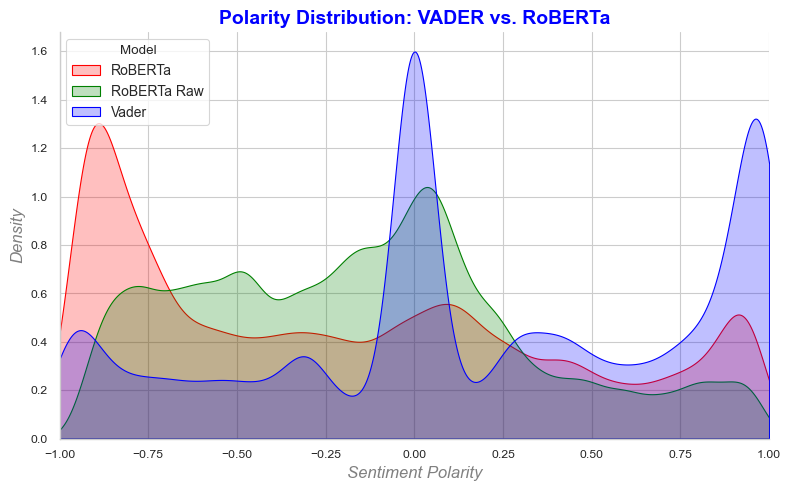

In [13]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid", palette="colorblind", context="paper")

# KDE plot with finer granularity and strict limits
sns.kdeplot(
    df_pres_debate["bert_sentiment"], 
    color="red", 
    fill=True, 
    label="RoBERTa", 
    bw_adjust=0.5, 
    clip=(-1, 1), 
    common_norm=False, 
    gridsize=1000
)

sns.kdeplot(
    df_pres_debate["bert_raw"], 
    color="green", 
    fill=True, 
    label="RoBERTa Raw", 
    bw_adjust=0.5, 
    clip=(-1, 1), 
    common_norm=False, 
    gridsize=1000
)
sns.kdeplot(
    df_pres_debate["vader_sentiment"], 
    color="blue", 
    fill=True, 
    label="Vader", 
    bw_adjust=0.5, 
    clip=(-1, 1), 
    common_norm=False, 
    gridsize=1000
)
plt.xlim(-1, 1)
plt.xlabel("Sentiment Polarity", fontsize=12, fontstyle="italic", color="gray")
plt.ylabel("Density", fontsize=12, fontstyle="italic", color="gray")
plt.title("Polarity Distribution: VADER vs. RoBERTa", fontsize=14, weight="bold", color="blue")
plt.legend(title="Model", fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()


C:\Users\danie\AppData\Local\Temp\ipykernel_33916\2908299699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pres_debate['bert_raw_label']=df_pres_debate['bert_raw'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))


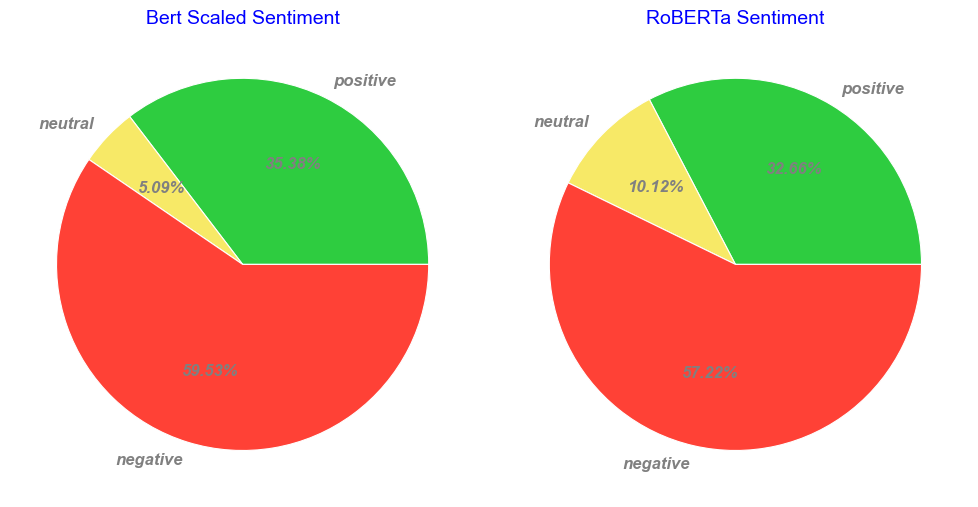

In [16]:
df_pres_debate['bert_raw_label']=df_pres_debate['bert_raw'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

colors = ["#2ecc40", "#F7E967", "#ff4136"]  # green, yellow, red
textprops = dict(fontsize=12, fontstyle="italic", weight="bold", color="gray")

# VADER pie chart
df_pres_debate["bert_label"].value_counts(normalize=True).reindex(["positive", "neutral", "negative"]).plot.pie(
    ax=axes[0], autopct="%.2f%%", colors=colors, textprops=textprops, ylabel=""
)
axes[0].set_title("Bert Scaled Sentiment", fontsize=14, color="blue")

# RoBERTa pie chart
df_pres_debate["bert_raw_label"].value_counts(normalize=True).reindex(["positive", "neutral", "negative"]).plot.pie(
    ax=axes[1], autopct="%.2f%%", colors=colors, textprops=textprops, ylabel=""
)
axes[1].set_title("RoBERTa Sentiment", fontsize=14, color="blue")

plt.tight_layout()
plt.show()
